/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
train data: images: (4000, 224, 224, 3)  labels: (4000, 1)
test data: images: (100, 224, 224, 3)  labels: (100, 1)
4000 train samples
100 test samples
(224, 224, 3)
(4000, 1)
(100, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      4864      
                                                                 
 dropout (Dropout)           (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
       

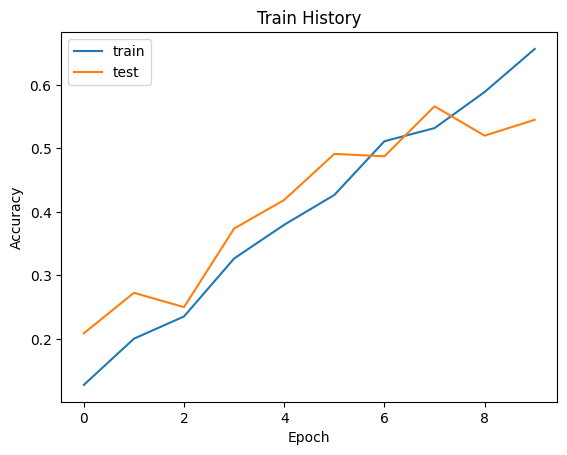

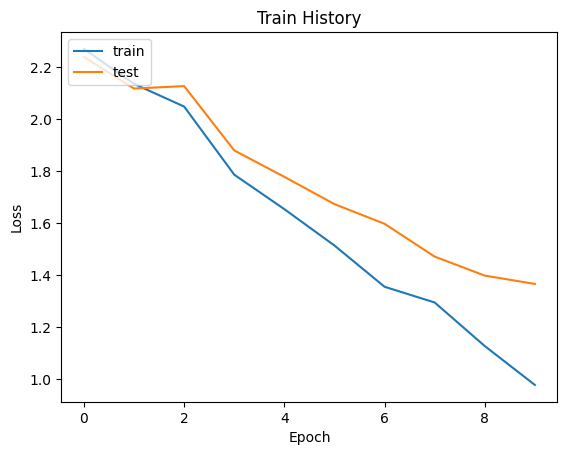

4/4 [==============================] - 0s 21ms/step
{0: 'aston_martin', 1: 'bentley', 2: 'ferrari', 3: 'jaguar', 4: 'land_rover', 5: 'maserati', 6: 'nissan', 7: 'rolls_royce', 8: 'skoda', 9: 'volkswagen'}


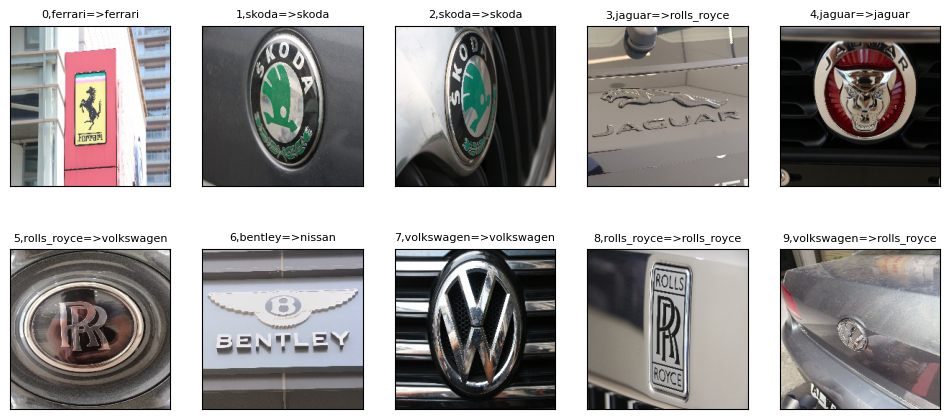

In [ ]:
import keras
import random
from keras.optimizers import Adam
adam = Adam(lr=0.001)

from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import RMSprop
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
import numpy as np
import os
from PIL import Image

#讀取資料夾212張圖片，圖片為彩色圖，3通道，圖像大小：150*250
def load_data():
    train_data = np.empty((4000, 3, 224, 224), dtype="uint8")
    train_labels = np.empty((4000,1), dtype="uint8")
    test_data = np.empty((100, 3, 224, 224), dtype="uint8")
    test_labels = np.empty((100,1), dtype="uint8")

    train_imgs = os.listdir("D:\1112機器學習\機器學習期中專題\car_logo_finail\Car logo\trainImg")
    num_train_imgs = len(train_imgs)
    for i in range(num_train_imgs):
        img = Image.open("D:\1112機器學習\機器學習期中專題\car_logo_finail\Car logo\trainImg" + train_imgs[i])
        arr = np.asarray(img)
        train_data[i,:,:,:] = [arr[:,:,0], arr[:,:,1], arr[:,:,2]]
        train_labels[i] = int(train_imgs[i].split('.')[0])

    test_imgs = os.listdir("D:\1112機器學習\機器學習期中專題\car_logo_finail\Car logo\testImg")
    num_test_imgs = len(test_imgs) 
    for i in range(num_test_imgs):
        img = Image.open("D:\1112機器學習\機器學習期中專題\car_logo_finail\Car logo\testImg" + test_imgs[i])
        arr = np.asarray(img)
        test_data[i,:,:,:] = [arr[:,:,0], arr[:,:,1], arr[:,:,2]]
        test_labels[i] = int(test_imgs[i].split('.')[0])
    
    return (train_data, train_labels), (test_data, test_labels)


np.random.seed(10)
batch_size = 128
num_classes = 10
epochs = 10

(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train.transpose(0, 2, 3, 1)
x_test = x_test.transpose(0, 2, 3, 1)
print("train data:",'images:',x_train.shape," labels:",y_train.shape) 
print("test data:",'images:',x_test.shape," labels:",y_test.shape) 

index_1 = [i for i in range(len(x_train))]
random.shuffle(index_1)
x_train = x_train[index_1]
y_train = y_train[index_1]

index_2 = [i for i in range(len(x_test))]
random.shuffle(index_2)
x_test = x_test[index_2]
y_test = y_test[index_2]


x_train_normalize = x_train.astype('float32') / 255.0
x_test_normalize = x_test.astype('float32') / 255.0
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train[0].shape)
y_train_OneHot = keras.utils.to_categorical(y_train, num_classes)
y_test_OneHot = keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_test.shape)




# Step 2. 建立模型

model = Sequential()

# 卷積層1與池化層1

model.add(Conv2D(filters=64,kernel_size=(5,5),
                 input_shape=(224, 224, 3), 
                 activation='relu', 
                 padding='same'))

model.add(Dropout(rate=0.3))

model.add(MaxPooling2D(pool_size=(2, 2)))

# 卷積層2與池化層2

model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))

# 卷積層3與池化層3

model.add(Conv2D(filters=32, kernel_size=(2, 2), 
                 activation='relu', padding='same'))

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))

# 卷積層4與池化層4

model.add(Conv2D(filters=16, kernel_size=(1, 1), 
                 activation='relu', padding='same'))

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3. 建立神經網路(平坦層、隱藏層、輸出層)

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['acc'])

train_history = model.fit(x_train_normalize, y_train_OneHot,
                    validation_split=0.2,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)


import matplotlib.pyplot as plt
def show_train_history(train_type,test_type):
    plt.plot(train_history.history[train_type])
    plt.plot(train_history.history[test_type])
    plt.title('Train History')
    if train_type == 'acc':
        plt.ylabel('Accuracy')
    elif train_type == 'loss':
        plt.ylabel('Loss')
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


show_train_history('acc','val_acc')
show_train_history('loss','val_loss')


scores = model.evaluate(x_test_normalize,y_test_OneHot,verbose=1)
scores[1]


prediction=model.predict(x_test_normalize)
prediction = prediction[:10]

label_dict={0:"aston_martin",1:"bentley",2:"ferrari",3:"jaguar",4:"land_rover",5:"maserati",6:"nissan",7:"rolls_royce",8:"skoda",9:"volkswagen"}
print(label_dict)		


import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')

        
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[np.argmax(prediction[i])]
            
        ax.set_title(title,fontsize=8) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()
#print(prediction)
plot_images_labels_prediction(x_test,y_test,prediction,0,10)
#print(y_test)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
train data: images: (4000, 224, 224, 3)  labels: (4000, 1)
test data: images: (100, 224, 224, 3)  labels: (100, 1)
4000 train samples
100 test samples
(224, 224, 3)
(4000, 1)
(100, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      4864      
                                                                 
 dropout (Dropout)           (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
       

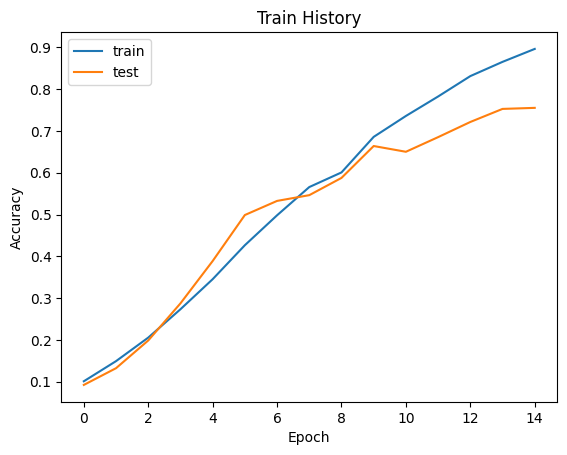

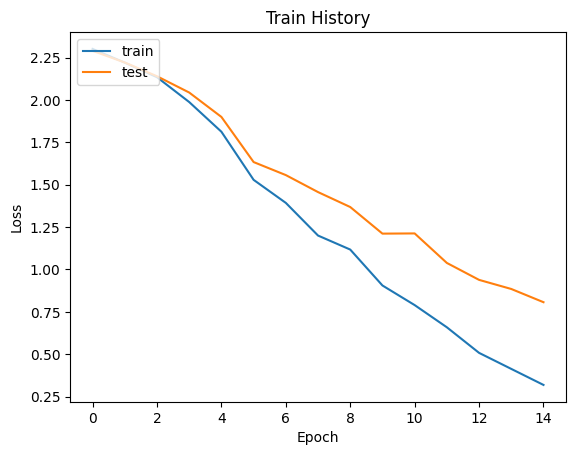

4/4 [==============================] - 0s 14ms/step
{0: 'aston_martin', 1: 'bentley', 2: 'ferrari', 3: 'jaguar', 4: 'land_rover', 5: 'maserati', 6: 'nissan', 7: 'rolls_royce', 8: 'skoda', 9: 'volkswagen'}


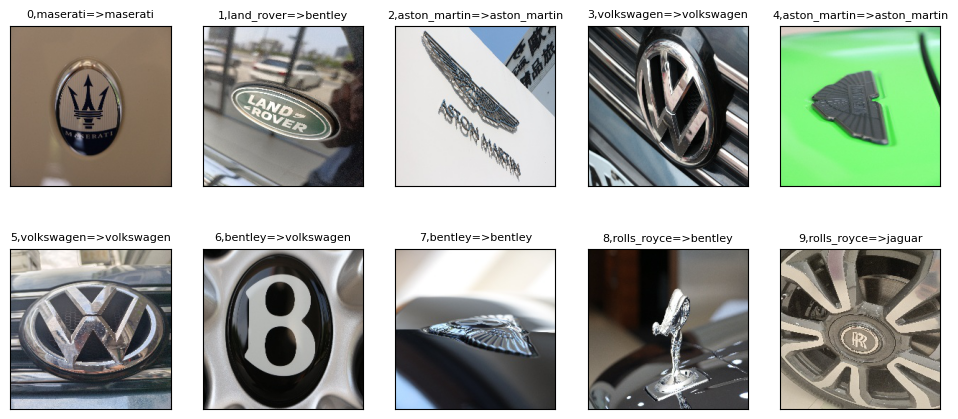

In [1]:
import keras
import random
from keras.optimizers import Adam
adam = Adam(lr=0.001)

from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import RMSprop
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
import numpy as np
import os
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

#讀取資料夾212張圖片，圖片為彩色圖，3通道，圖像大小：150*250
def load_data():
    train_data = np.empty((4000, 3, 224, 224), dtype="uint8")
    train_labels = np.empty((4000,1), dtype="uint8")
    test_data = np.empty((100, 3, 224, 224), dtype="uint8")
    test_labels = np.empty((100,1), dtype="uint8")

    train_imgs = os.listdir("/content/drive/MyDrive/Colab Notebooks/car_logo_finail/Car logo/trainImg")
    num_train_imgs = len(train_imgs)
    for i in range(num_train_imgs):
        img = Image.open("/content/drive/MyDrive/Colab Notebooks/car_logo_finail/Car logo/trainImg/" + train_imgs[i])
        arr = np.asarray(img)
        train_data[i,:,:,:] = [arr[:,:,0], arr[:,:,1], arr[:,:,2]]
        train_labels[i] = int(train_imgs[i].split('.')[0])

    test_imgs = os.listdir("/content/drive/MyDrive/Colab Notebooks/car_logo_finail/Car logo/testImg")
    num_test_imgs = len(test_imgs) 
    for i in range(num_test_imgs):
        img = Image.open("/content/drive/MyDrive/Colab Notebooks/car_logo_finail/Car logo/testImg/" + test_imgs[i])
        arr = np.asarray(img)
        test_data[i,:,:,:] = [arr[:,:,0], arr[:,:,1], arr[:,:,2]]
        test_labels[i] = int(test_imgs[i].split('.')[0])
    
    return (train_data, train_labels), (test_data, test_labels)


np.random.seed(10)
batch_size = 128
num_classes = 10
epochs = 15

(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train.transpose(0, 2, 3, 1)
x_test = x_test.transpose(0, 2, 3, 1)
print("train data:",'images:',x_train.shape," labels:",y_train.shape) 
print("test data:",'images:',x_test.shape," labels:",y_test.shape) 

index_1 = [i for i in range(len(x_train))]
random.shuffle(index_1)
x_train = x_train[index_1]
y_train = y_train[index_1]

index_2 = [i for i in range(len(x_test))]
random.shuffle(index_2)
x_test = x_test[index_2]
y_test = y_test[index_2]


x_train_normalize = x_train.astype('float32') / 255.0
x_test_normalize = x_test.astype('float32') / 255.0
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train[0].shape)
y_train_OneHot = keras.utils.to_categorical(y_train, num_classes)
y_test_OneHot = keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_test.shape)




# Step 2. 建立模型

model = Sequential()

# 卷積層1與池化層1

model.add(Conv2D(filters=64,kernel_size=(5,5),
                 input_shape=(224, 224, 3), 
                 activation='relu', 
                 padding='same'))

model.add(Dropout(rate=0.3))

model.add(MaxPooling2D(pool_size=(2, 2)))

# 卷積層2與池化層2

model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))

# 卷積層3與池化層3

model.add(Conv2D(filters=32, kernel_size=(2, 2), 
                 activation='relu', padding='same'))

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))

# 卷積層4與池化層4

model.add(Conv2D(filters=16, kernel_size=(1, 1), 
                 activation='relu', padding='same'))

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3. 建立神經網路(平坦層、隱藏層、輸出層)

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['acc'])

train_history = model.fit(x_train_normalize, y_train_OneHot,
                    validation_split=0.2,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)


import matplotlib.pyplot as plt
def show_train_history(train_type,test_type):
    plt.plot(train_history.history[train_type])
    plt.plot(train_history.history[test_type])
    plt.title('Train History')
    if train_type == 'acc':
        plt.ylabel('Accuracy')
    elif train_type == 'loss':
        plt.ylabel('Loss')
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


show_train_history('acc','val_acc')
show_train_history('loss','val_loss')


scores = model.evaluate(x_test_normalize,y_test_OneHot,verbose=1)
scores[1]


prediction=model.predict(x_test_normalize)
prediction = prediction[:10]

label_dict={0:"aston_martin",1:"bentley",2:"ferrari",3:"jaguar",4:"land_rover",5:"maserati",6:"nissan",7:"rolls_royce",8:"skoda",9:"volkswagen"}
print(label_dict)		


import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')

        
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[np.argmax(prediction[i])]
            
        ax.set_title(title,fontsize=8) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()
#print(prediction)
plot_images_labels_prediction(x_test,y_test,prediction,0,10)
#print(y_test)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
train data: images: (4000, 224, 224, 3)  labels: (4000, 1)
test data: images: (100, 224, 224, 3)  labels: (100, 1)
4000 train samples
100 test samples
(224, 224, 3)
(4000, 1)
(100, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      4864      
                                                                 
 dropout (Dropout)           (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
       

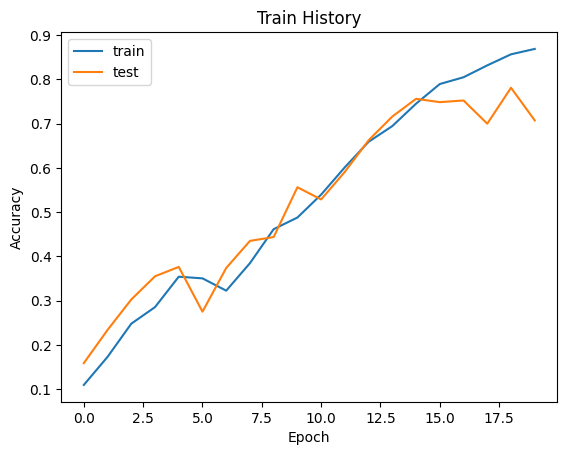

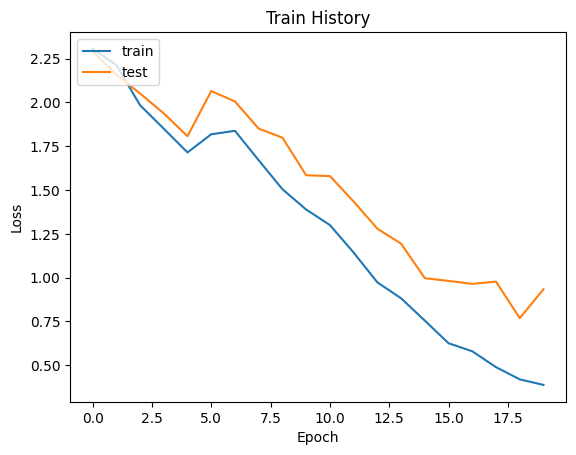

4/4 [==============================] - 0s 15ms/step
{0: 'aston_martin', 1: 'bentley', 2: 'ferrari', 3: 'jaguar', 4: 'land_rover', 5: 'maserati', 6: 'nissan', 7: 'rolls_royce', 8: 'skoda', 9: 'volkswagen'}


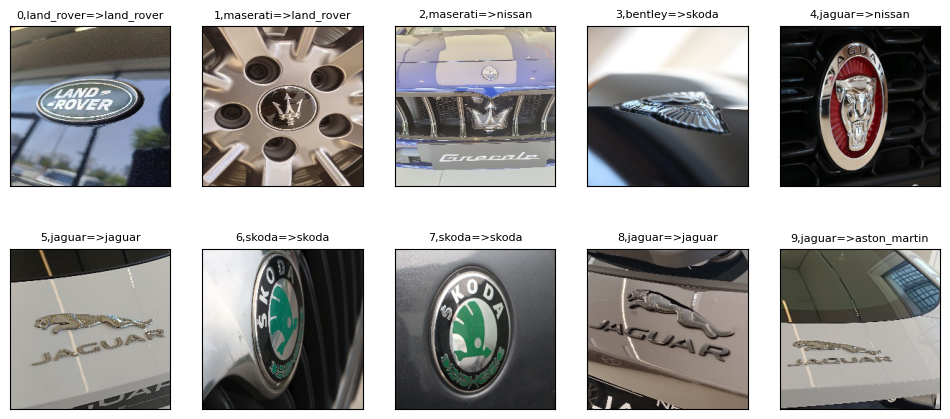

In [1]:
import keras
import random
from keras.optimizers import Adam
adam = Adam(lr=0.001)

from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import RMSprop
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
import numpy as np
import os
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')


def load_data():
    train_data = np.empty((4000, 3, 224, 224), dtype="uint8")
    train_labels = np.empty((4000,1), dtype="uint8")
    test_data = np.empty((100, 3, 224, 224), dtype="uint8")
    test_labels = np.empty((100,1), dtype="uint8")

    train_imgs = os.listdir("/content/drive/MyDrive/Colab Notebooks/car_logo_finail/Car logo/trainImg")
    num_train_imgs = len(train_imgs)
    for i in range(num_train_imgs):
        img = Image.open("/content/drive/MyDrive/Colab Notebooks/car_logo_finail/Car logo/trainImg/" + train_imgs[i])
        arr = np.asarray(img)
        train_data[i,:,:,:] = [arr[:,:,0], arr[:,:,1], arr[:,:,2]]
        train_labels[i] = int(train_imgs[i].split('.')[0])

    test_imgs = os.listdir("/content/drive/MyDrive/Colab Notebooks/car_logo_finail/Car logo/testImg")
    num_test_imgs = len(test_imgs) 
    for i in range(num_test_imgs):
        img = Image.open("/content/drive/MyDrive/Colab Notebooks/car_logo_finail/Car logo/testImg/" + test_imgs[i])
        arr = np.asarray(img)
        test_data[i,:,:,:] = [arr[:,:,0], arr[:,:,1], arr[:,:,2]]
        test_labels[i] = int(test_imgs[i].split('.')[0])
    
    return (train_data, train_labels), (test_data, test_labels)


np.random.seed(10)
batch_size = 128
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train.transpose(0, 2, 3, 1)
x_test = x_test.transpose(0, 2, 3, 1)
print("train data:",'images:',x_train.shape," labels:",y_train.shape) 
print("test data:",'images:',x_test.shape," labels:",y_test.shape) 

index_1 = [i for i in range(len(x_train))]
random.shuffle(index_1)
x_train = x_train[index_1]
y_train = y_train[index_1]

index_2 = [i for i in range(len(x_test))]
random.shuffle(index_2)
x_test = x_test[index_2]
y_test = y_test[index_2]


x_train_normalize = x_train.astype('float32') / 255.0
x_test_normalize = x_test.astype('float32') / 255.0
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train[0].shape)
y_train_OneHot = keras.utils.to_categorical(y_train, num_classes)
y_test_OneHot = keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_test.shape)




# Step 2. 建立模型

model = Sequential()

# 卷積層1與池化層1

model.add(Conv2D(filters=64,kernel_size=(5,5),
                 input_shape=(224, 224, 3), 
                 activation='relu', 
                 padding='same'))

model.add(Dropout(rate=0.3))

model.add(MaxPooling2D(pool_size=(2, 2)))

# 卷積層2與池化層2

model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))

# 卷積層3與池化層3

model.add(Conv2D(filters=32, kernel_size=(2, 2), 
                 activation='relu', padding='same'))

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))

# 卷積層4與池化層4

model.add(Conv2D(filters=16, kernel_size=(1, 1), 
                 activation='relu', padding='same'))

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3. 建立神經網路(平坦層、隱藏層、輸出層)

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['acc'])

train_history = model.fit(x_train_normalize, y_train_OneHot,
                    validation_split=0.2,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)


import matplotlib.pyplot as plt
def show_train_history(train_type,test_type):
    plt.plot(train_history.history[train_type])
    plt.plot(train_history.history[test_type])
    plt.title('Train History')
    if train_type == 'acc':
        plt.ylabel('Accuracy')
    elif train_type == 'loss':
        plt.ylabel('Loss')
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


show_train_history('acc','val_acc')
show_train_history('loss','val_loss')


scores = model.evaluate(x_test_normalize,y_test_OneHot,verbose=1)
scores[1]


prediction=model.predict(x_test_normalize)
prediction = prediction[:10]

label_dict={0:"aston_martin",1:"bentley",2:"ferrari",3:"jaguar",4:"land_rover",5:"maserati",6:"nissan",7:"rolls_royce",8:"skoda",9:"volkswagen"}
print(label_dict)		


import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')

        
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[np.argmax(prediction[i])]
            
        ax.set_title(title,fontsize=8) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()
#print(prediction)
plot_images_labels_prediction(x_test,y_test,prediction,0,10)
#print(y_test)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
train data: images: (4000, 224, 224, 3)  labels: (4000, 1)
test data: images: (100, 224, 224, 3)  labels: (100, 1)
4000 train samples
100 test samples
(224, 224, 3)
(4000, 1)
(100, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      4864      
                                                                 
 dropout (Dropout)           (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
       

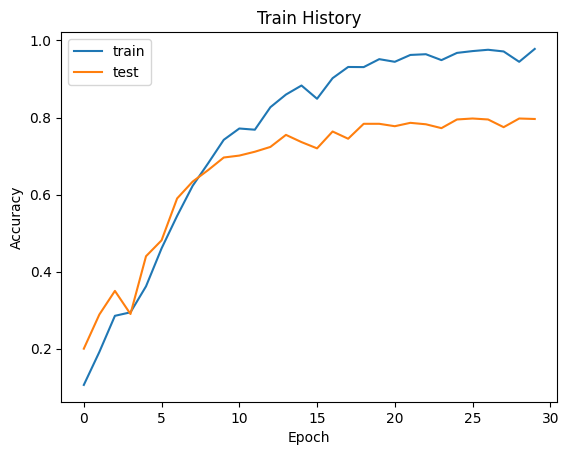

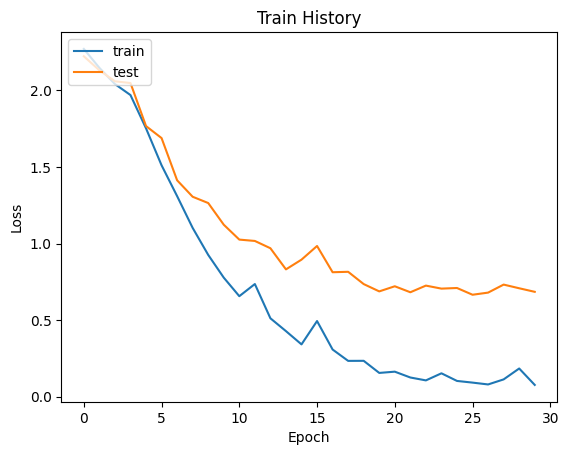

4/4 [==============================] - 0s 15ms/step
{0: 'aston_martin', 1: 'bentley', 2: 'ferrari', 3: 'jaguar', 4: 'land_rover', 5: 'maserati', 6: 'nissan', 7: 'rolls_royce', 8: 'skoda', 9: 'volkswagen'}


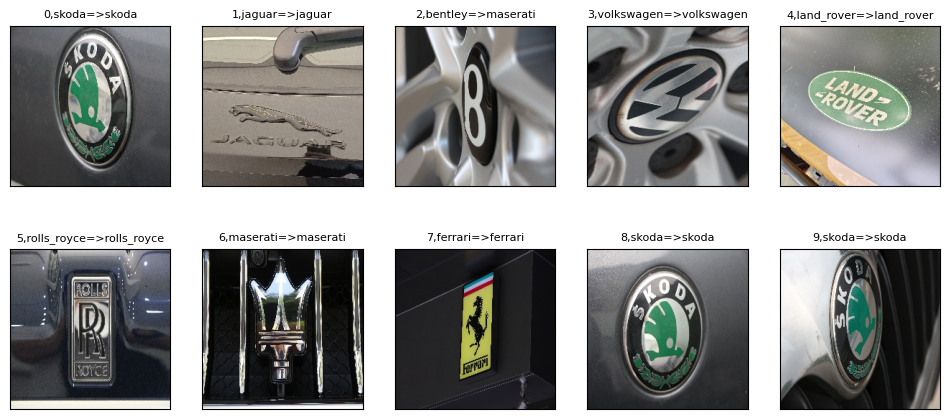

In [1]:
import keras
import random
from keras.optimizers import Adam
adam = Adam(lr=0.001)

from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import RMSprop
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
import numpy as np
import os
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')


def load_data():
    train_data = np.empty((4000, 3, 224, 224), dtype="uint8")
    train_labels = np.empty((4000,1), dtype="uint8")
    test_data = np.empty((100, 3, 224, 224), dtype="uint8")
    test_labels = np.empty((100,1), dtype="uint8")

    train_imgs = os.listdir("/content/drive/MyDrive/Colab Notebooks/car_logo_finail/Car logo/trainImg")
    num_train_imgs = len(train_imgs)
    for i in range(num_train_imgs):
        img = Image.open("/content/drive/MyDrive/Colab Notebooks/car_logo_finail/Car logo/trainImg/" + train_imgs[i])
        arr = np.asarray(img)
        train_data[i,:,:,:] = [arr[:,:,0], arr[:,:,1], arr[:,:,2]]
        train_labels[i] = int(train_imgs[i].split('.')[0])

    test_imgs = os.listdir("/content/drive/MyDrive/Colab Notebooks/car_logo_finail/Car logo/testImg")
    num_test_imgs = len(test_imgs) 
    for i in range(num_test_imgs):
        img = Image.open("/content/drive/MyDrive/Colab Notebooks/car_logo_finail/Car logo/testImg/" + test_imgs[i])
        arr = np.asarray(img)
        test_data[i,:,:,:] = [arr[:,:,0], arr[:,:,1], arr[:,:,2]]
        test_labels[i] = int(test_imgs[i].split('.')[0])
    
    return (train_data, train_labels), (test_data, test_labels)


np.random.seed(10)
batch_size = 128
num_classes = 10
epochs = 30

(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train.transpose(0, 2, 3, 1)
x_test = x_test.transpose(0, 2, 3, 1)
print("train data:",'images:',x_train.shape," labels:",y_train.shape) 
print("test data:",'images:',x_test.shape," labels:",y_test.shape) 

index_1 = [i for i in range(len(x_train))]
random.shuffle(index_1)
x_train = x_train[index_1]
y_train = y_train[index_1]

index_2 = [i for i in range(len(x_test))]
random.shuffle(index_2)
x_test = x_test[index_2]
y_test = y_test[index_2]


x_train_normalize = x_train.astype('float32') / 255.0
x_test_normalize = x_test.astype('float32') / 255.0
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train[0].shape)
y_train_OneHot = keras.utils.to_categorical(y_train, num_classes)
y_test_OneHot = keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_test.shape)




# Step 2. 建立模型

model = Sequential()

# 卷積層1與池化層1

model.add(Conv2D(filters=64,kernel_size=(5,5),
                 input_shape=(224, 224, 3), 
                 activation='relu', 
                 padding='same'))

model.add(Dropout(rate=0.3))

model.add(MaxPooling2D(pool_size=(2, 2)))

# 卷積層2與池化層2

model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))

# 卷積層3與池化層3

model.add(Conv2D(filters=32, kernel_size=(2, 2), 
                 activation='relu', padding='same'))

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))

# 卷積層4與池化層4

model.add(Conv2D(filters=16, kernel_size=(1, 1), 
                 activation='relu', padding='same'))

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3. 建立神經網路(平坦層、隱藏層、輸出層)

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['acc'])

train_history = model.fit(x_train_normalize, y_train_OneHot,
                    validation_split=0.2,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)


import matplotlib.pyplot as plt
def show_train_history(train_type,test_type):
    plt.plot(train_history.history[train_type])
    plt.plot(train_history.history[test_type])
    plt.title('Train History')
    if train_type == 'acc':
        plt.ylabel('Accuracy')
    elif train_type == 'loss':
        plt.ylabel('Loss')
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


show_train_history('acc','val_acc')
show_train_history('loss','val_loss')


scores = model.evaluate(x_test_normalize,y_test_OneHot,verbose=1)
scores[1]


prediction=model.predict(x_test_normalize)
prediction = prediction[:10]

label_dict={0:"aston_martin",1:"bentley",2:"ferrari",3:"jaguar",4:"land_rover",5:"maserati",6:"nissan",7:"rolls_royce",8:"skoda",9:"volkswagen"}
print(label_dict)		


import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')

        
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[np.argmax(prediction[i])]
            
        ax.set_title(title,fontsize=8) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()
#print(prediction)
plot_images_labels_prediction(x_test,y_test,prediction,0,10)
#print(y_test)